# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_02_004
## Геометричні перетворення. Обертання

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.io import imread

In [2]:
# ----------------
#   AABB BOX ФУНКЦІЯ
# ----------------
# повертає координти BOX
def abbox(im, coloure):
    r_num = im.shape[0] ## кількість рядків
    c_num = im.shape[1] ## кількість колонок
    
    if coloure < 0 or coloure > 2 : return "COLOR"
    
    a_x = r_num # мінімальна строка
    a_y = c_num # мінімальний столбец
    b_x = 0 # максимальна строка
    b_y = 0 # максимальний столбец

    for j in  range (c_num):
        i_min = r_num
        i_max = 0
        for i in  range (r_num-1):
            if im [i+1, j,  coloure] > im [i, j,  coloure]: i_min = i+1
            if im [i+1, j,  coloure] < im [i, j,  coloure]: i_max = i+1            
        if a_x > i_min : a_x = i_min 
        if b_x < i_max : b_x = i_max

    for i in  range (r_num):
        j_min = c_num
        j_max = 0
        for j in  range (c_num-1):
            if im [i, j+1,  coloure] > im [i, j,  coloure]: j_min = j+1
            if im [i, j+1,  coloure] < im [i, j,  coloure]: j_max = j+1            
        if a_y > j_min : a_y = j_min 
        if b_y < j_max : b_y = j_max
    return [[a_x,a_y],[b_x,b_y]]               


#### 1. Функція обретання

In [3]:
## ---------------------------------------------
## Обертання пікселя на визначений кут
## i, j        координати пікселя
## iс, jс      координати центрального пікселя
## angle_grad  кут обертання
## ---------------------------------------------

def pixel_rotation(i, j, ic, jc, angle_grad):
    #print (i, j, ic, jc, angle_grad)
    
    i_start = np.float32(i-ic) 
    j_start = np.float32(j-ic) 
    #print ('Start Point' , i_start, j_start)
    
    a_sin = np.sin(angle_grad*np.pi/180.0)
    a_cos = np.cos(angle_grad*np.pi/180.0)
    #print (a_sin, a_cos) 
    
    i_r = np.uint32((i_start * a_cos - j_start * a_sin) + ic)
    j_r = np.uint32((j_start * a_cos + i_start * a_sin) + jc)
    #print (i_r, j_r) 
    return [i_r,j_r]

# Перевірка
# pixel_rotation(50, 50, 100, 100, -90)
# print (pixel_rotation(50, 50, 100, 100, -90))


#### Формування вхідного зображення

In [4]:
## Завантаження файлу зображення для розрахунку центра тяжиння
path = './IMAGES/'
filenameP = 'Obj_P_Red.png' 
p_im = io.imread(path + filenameP)

In [5]:
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', p_im.shape, 'IMAGE SIZE', p_im.size)

prows_num = p_im.shape[0] ## кількість рядків
pclms_num = p_im.shape[1] ## кількість колонок
ppix_num = prows_num*pclms_num ## кількість пікселів
print ('ROWS NUMBER', prows_num, 'CLMS NUMBER', pclms_num, 'PIX NUMBER', ppix_num)

# Формуємо тільки червоне зображення
p_im_ = np.full ((prows_num, pclms_num, 3), (0, 0, 0) , dtype=np.uint8) 
for i in  range (prows_num):
    for j in  range (pclms_num):
        if p_im [i, j, 0] > 126 : p_im_ [i, j, :] = [255,0,0]

IMAGE SHAPE (800, 800, 3) IMAGE SIZE 1920000
ROWS NUMBER 800 CLMS NUMBER 800 PIX NUMBER 640000


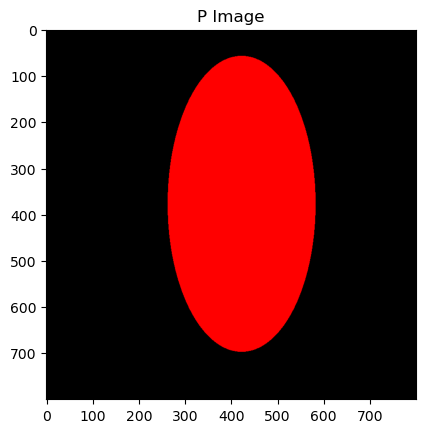

In [6]:
plt.imshow(p_im_)
plt.title("P Image")
plt.show()

#### Визначаємо центр та BOX

In [7]:
# Обчислюємо площу
Square_White = 0

centr_x = 0 
centr_y = 0 

for i in  range (prows_num):
    for j in  range (pclms_num):
        if p_im_ [i, j, 0] == 255: Square_White += 1
        if p_im_ [i, j, 0] == 255 : centr_y += j 
        if p_im_ [i, j, 0] == 255 : centr_x += i 
            
print ('Площа області', Square_White)
           
Centr_i = np.int32(centr_x / Square_White)     
Centr_j = np.int32(centr_y / Square_White)     
       
print ('Центр P: Координата X:', Centr_i , 'Координата Y:',Centr_j )

im_Box = abbox(p_im_, 0)
print ('AB BOX -->',im_Box )


Площа області 160864
Центр P: Координата X: 377 Координата Y: 422
AB BOX --> [[58, 263], [698, 583]]


#### Повертаємо навколо центру

In [8]:
rot_im = np.zeros ((prows_num, pclms_num, 3), dtype=np.uint8)
rot_im_ = np.zeros ((prows_num, pclms_num, 3), dtype=np.uint8)

angl = -20
start_i = im_Box [0][0]
len_i   = im_Box [1][0] - im_Box [0][0]
print ('Start_I',start_i,'Leng_I',len_i)

start_j = im_Box [0][1]
len_j   = im_Box [1][1] - im_Box [0][1]
print ('Start_J',start_j,'Leng_J',len_j)

for i in  range (start_i, start_i+len_i ):
    for j in  range (start_j,start_j + len_j ):
        new_ij = pixel_rotation(i, j, Centr_i, Centr_j , angl)
        rot_im [new_ij [0], new_ij [1], : ] = p_im_[i, j, :]

# ПРИМИТИВНЫЙ МИНИ МАКСНЫЙ ФИЛЬТР
for i in  range (5, prows_num-5 ):
    for j in  range (5, pclms_num - 5 ):
        if rot_im [i, j, 0 ] != 255 :
            new = max(rot_im [i-1, j, 0 ], rot_im [i+1, j, 0 ], rot_im [i, j-1, 0], rot_im [i, j+1, 0 ])
            rot_im_ [i, j : ] = [new, 0,0]


Start_I 58 Leng_I 640
Start_J 263 Leng_J 320


#### Повернене ROT_im -- Без Фільтра

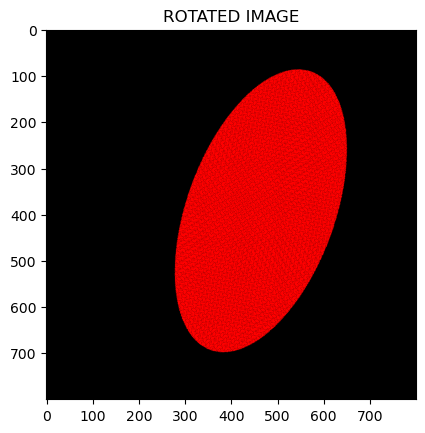

In [9]:
plt.title('ROTATED IMAGE')
plt.imshow(rot_im)
plt.show()

#### Повернене ROT_im_  -- з  Мін/Макс Фільтром

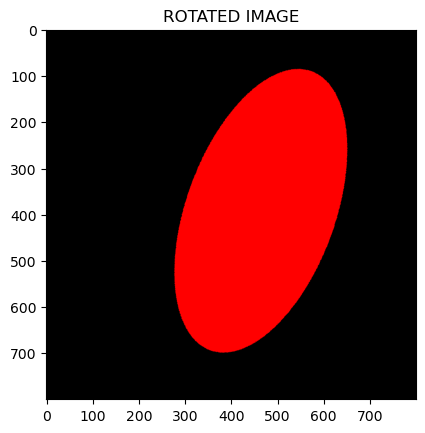

In [10]:
plt.title('ROTATED IMAGE')
plt.imshow(rot_im_)
plt.show()

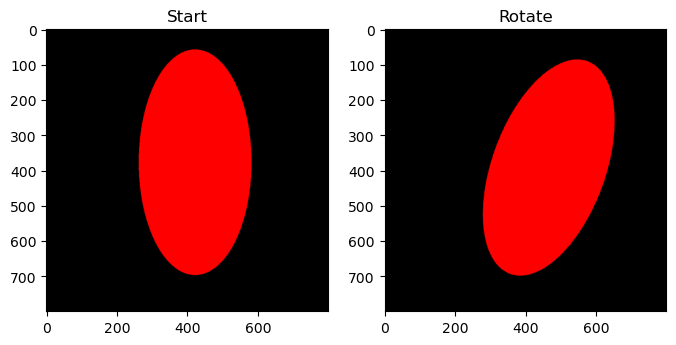

In [12]:
## НАЛОЖЕНИЕ
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(p_im_)
ax[0].set_title("Start")
ax[1].imshow(rot_im_)
ax[1].set_title("Rotate")
plt.show()